In [2]:
# Imports
%matplotlib inline
import quandl
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from backtesters import MABacktester

In [8]:
# Get ETH prices for GDAX exchange
eth = quandl.get("GDAX/ETH_BTC")  # GDAX/ETH_USD
eth = eth.shift(-1).dropna() # GDAX has daily OPEN, shift to get daily CLOSE
eth.columns = [u'Last', u'High', u'Low', u'Volume'] # rename columns

In [51]:
prices = eth.loc['2018-05-16':,'Last'] 
follow_up = MABacktester(prices,ms=1,ml=18)
follow_up.results()

{'Current_stance': 1,
 'Market': -57.65,
 'Market_pa': -91.22,
 'Market_sharpe': -4.34,
 'Sharpe': 1.57,
 'Strategy': 35.33,
 'Strategy_pa': 135.52,
 'Trades': 14,
 'Trades_per_month': 3.3,
 'Unrealised': -2.56,
 'Years': 0.35}

In [53]:
# Long only
MABacktester(prices,ms=1,ml=18, long_only=True).results()

{'Current_stance': 1,
 'Market': -57.65,
 'Market_pa': -91.22,
 'Market_sharpe': -4.34,
 'Sharpe': -5.31,
 'Strategy': -21.05,
 'Strategy_pa': -48.8,
 'Trades': 13,
 'Trades_per_month': 3.07,
 'Unrealised': -2.56,
 'Years': 0.35}

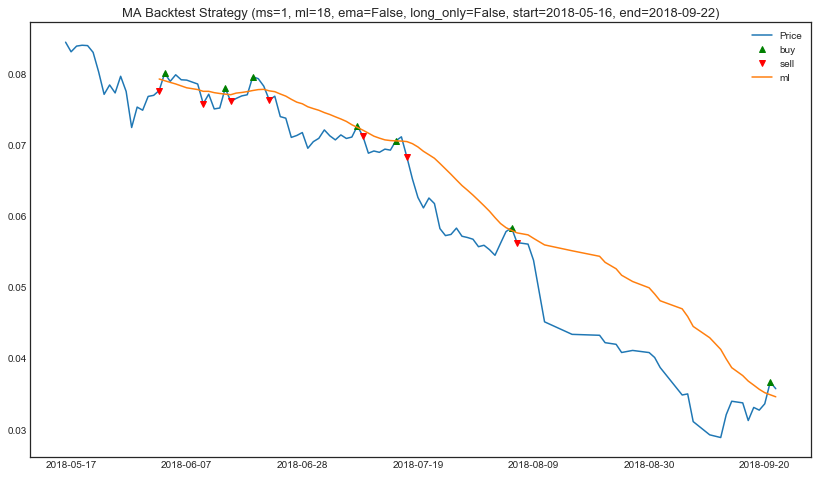

In [44]:
follow_up.plot(figsize=(14,8));

In [41]:
follow_up.trades()

,Type,Entry,Exit,Days,Return%
Date,,,,,
2018-06-02,Short,0.07769,0.08012,1,-3.03
2018-06-03,Long,0.08012,0.07584,7,-5.34
2018-06-10,Short,0.07584,0.07802,4,-2.79
2018-06-14,Long,0.07802,0.07615,1,-2.40
2018-06-15,Short,0.07615,0.07963,4,-4.37
2018-06-19,Long,0.07963,0.07635,3,-4.12
2018-06-22,Short,0.07635,0.07270,16,5.02
2018-07-08,Long,0.07270,0.07128,1,-1.95
2018-07-09,Short,0.07128,0.07063,6,0.92


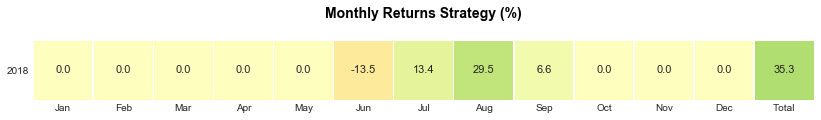

In [42]:
follow_up.plot_heatmap(figsize=(14,12));